In [ ]:
#https://halomod.readthedocs.io/en/latest/examples/getting_started.html
#!pip install healpy
!pip install halomod

!apt install cm-super
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash

!pip install SciencePlots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 2.2 MB/s eta 0:00:00
  Created wheel for camb: filename=camb-1.3.6-py3-none-any.whl size=1044377 sha256=51504b6a51728b121d42338dd499ceb808711e5ef5879066d134a1df36ce4160
  Stored in directory: /root/.cache/pip/wheels/bd/67/8c/7ccb547de7a94170c67cc3294f520e48451d1947bb26572bce
Successfully built camb
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The f

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
plt.rcParams.update({'figure.dpi': '300'})

import numpy as np

from halomod import HaloModel
from halomod import DMHaloModel
from halomod import TracerHaloModel
import halomod
import hmf
from halomod.concentration import Bullock01

In [ ]:
#hm.halo_concentration_model = Bullock01
#hm.mdef_model = 'SOCritical'

In [ ]:
#z=0.127
hm_des1 = HaloModel(z = 0.127, cosmo_params = {'Om0': 0.34,'H0': 67.37},sigma_8=0.735,n=0.96)
hm_hr41 = HaloModel(z = 0.127, cosmo_params = {'Om0': 0.26,'H0': 72.00},sigma_8=0.796,n=0.96)

hm_des2 = HaloModel(z = 0.3, cosmo_params = {'Om0': 0.34,'H0': 67.37},sigma_8=0.735,n=0.96)
hm_hr42 = HaloModel(z = 0.3, cosmo_params = {'Om0': 0.26,'H0': 72.00},sigma_8=0.796,n=0.96)

hm_des3 = HaloModel(z = 0.449, cosmo_params = {'Om0': 0.34,'H0': 67.37},sigma_8=0.735,n=0.96)
hm_hr43 = HaloModel(z = 0.449, cosmo_params = {'Om0': 0.26,'H0': 72.00},sigma_8=0.796,n=0.96)

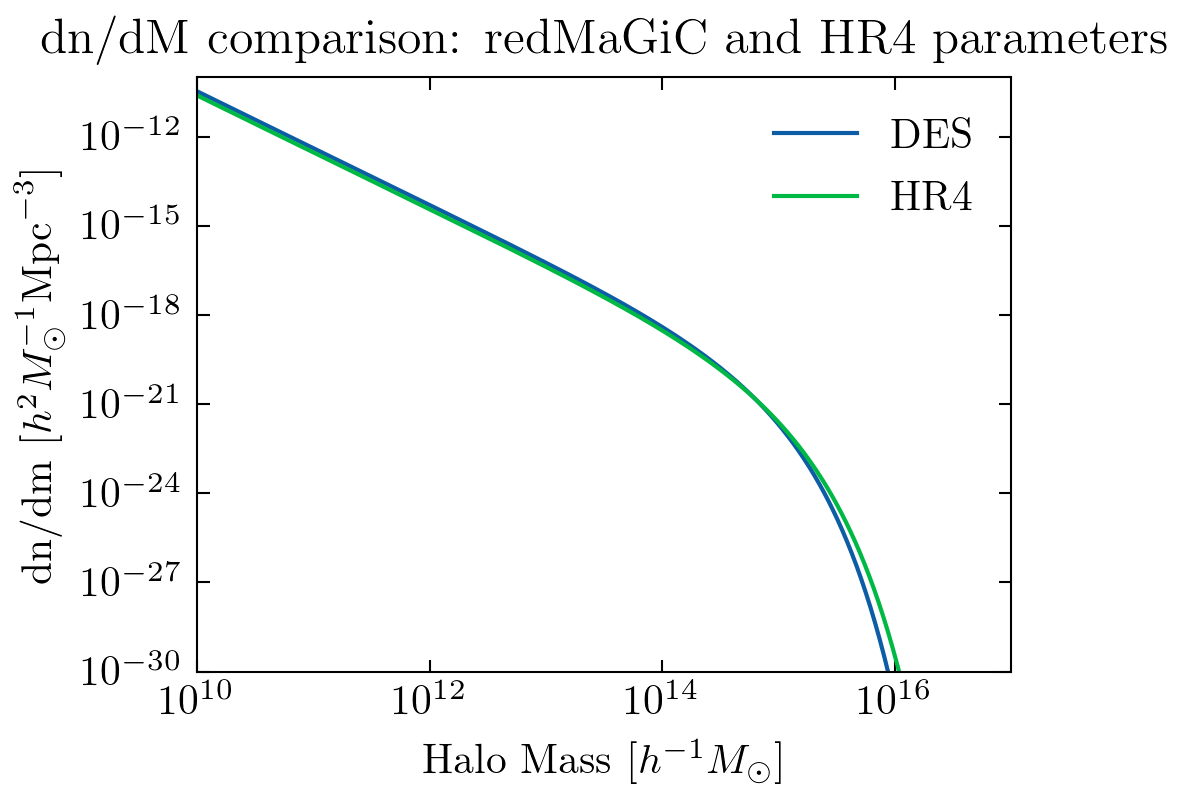

In [ ]:
plt.plot(hm_des1.m, hm_des1.dndm,label='DES')
plt.plot(hm_hr41.m, hm_hr41.dndm,label='HR4')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(10**10,10**17)
plt.ylim(10**-30,10**-10)
plt.xlabel("Halo Mass [$h^{-1} M_\odot$]")
plt.ylabel(r"dn/dm [$h^2 M_\odot^{-1} {\rm Mpc}^{-3}$]")
plt.title('dn/dM comparison: redMaGiC and HR4 parameters')
plt.savefig('/content/drive/MyDrive/dndm_halo.png',dpi=300)

<ipython-input-9-42672098ac7c>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(hm_des1.m, hm_des1.dndm/hm_hr41.dndm,label='z=0.127')
<ipython-input-9-42672098ac7c>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(hm_des2.m, hm_des2.dndm/hm_hr42.dndm,label='z=0.300')
<ipython-input-9-42672098ac7c>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(hm_des3.m, hm_des3.dndm/hm_hr43.dndm,label='z=0.449')


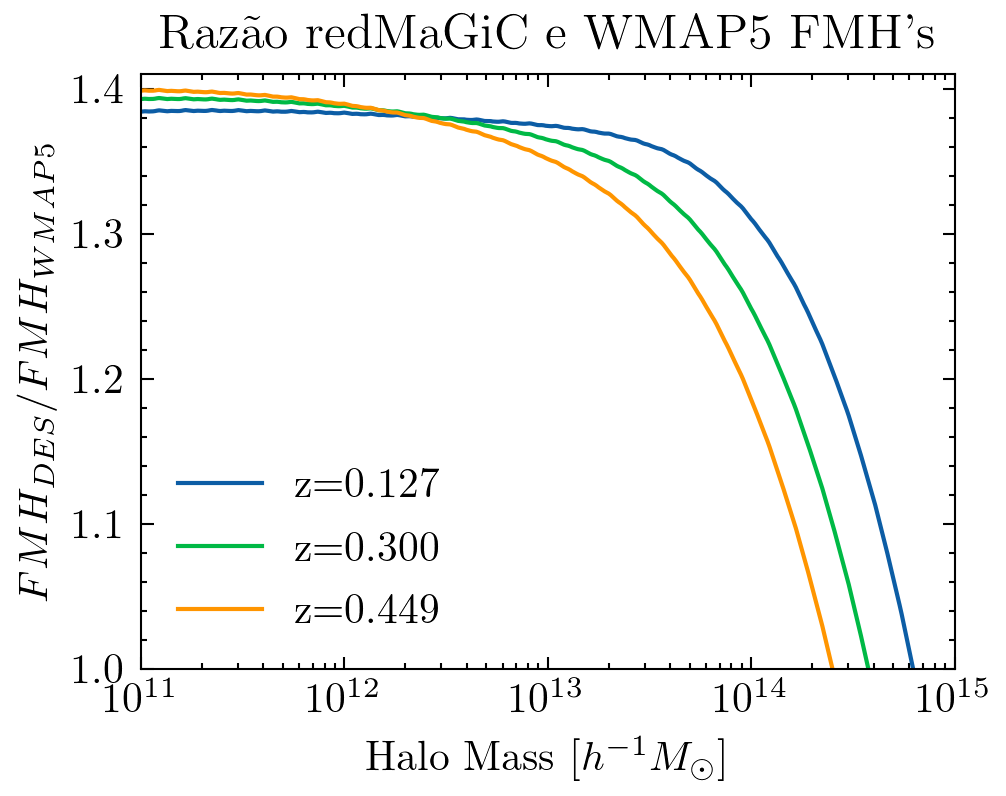

In [ ]:
plt.plot(hm_des1.m, hm_des1.dndm/hm_hr41.dndm,label='z=0.127')
plt.plot(hm_des2.m, hm_des2.dndm/hm_hr42.dndm,label='z=0.300')
plt.plot(hm_des3.m, hm_des3.dndm/hm_hr43.dndm,label='z=0.449')
plt.xscale('log')
#plt.yscale('log')
plt.xlim(10**11,10**15)
plt.ylim(1,1.41)
plt.legend()
plt.xlabel("Halo Mass [$h^{-1} M_\odot$]")
plt.ylabel(r"$FMH_{DES}/FMH_{WMAP5}$")
plt.title('Razão redMaGiC e WMAP5 FMH\'s')
#plt.savefig('/content/drive/MyDrive/espectro_potencia/imagens/dndm_halo_ratio.png',dpi=300)
plt.show()